# Assignment 0: Data Exploration

An important first step to every data analysis project is to explore your data. Data exploration helps you become familiar with your data, find noise and outliers, clean your data, and prepare your data for data mining. It is important that have a good understanding of what is in your data. 

## Part 1: Leaf Dataset

For this task we'll be using a subset of the leaf dataset created by professors from University of Porto, Portugal. This dataset consists in a collection of shape and texture features extracted from digital images of leaf specimens originating from a total of 40 different plant species, but for the purpose of this assignment we're only going to consider 4 plant species.

You can find more information about the dataset [here](http://archive.ics.uci.edu/ml/datasets/Leaf).

<img src="imgs/screen4.png">

In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import seaborn as sns

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

pd.__version__ #print which version of pandas you're using

'0.24.2'

Read in the dataset. You can find more on reading CSV (Comma Separated Values) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [2]:
leaf_data = pd.read_csv("leaf.csv")
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,NaN,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.99512,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.19287,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.52212,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.33254,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q1. Eccentricity of the leaf is a measure of how much the shape of the leaf varies from a perfect circle. Unfortunately the dataset is missing values in the `eccentricity` column. How many missing values are there in this column?

In [3]:
# your code goes here
leaf_data.isna().sum() 
# Only values missing are within eccentricity column 
# There are 5 missing values

class                        0
eccentricity                 5
aspect-ratio                 0
elongation                   0
solidity                     0
stochastic-convexity         0
isoperimetric-factor         0
maximal-indentation-depth    0
lobedness                    0
average-intensity            0
average-contrast             0
smoothness                   0
third-moment                 0
uniformity                   0
entropy                      0
dtype: int64

Q2. Fill in these missing values with something reasonable. Show the head of the dataframe.

In [4]:
# your code goes here
leaf_data['eccentricity'] = pd.to_numeric(leaf_data['eccentricity'])
leaf_mns = leaf_data.mean() 
leaf_data = leaf_data.replace(np.nan, leaf_mns) # replace NaN values with the mean of the column
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,0.567526,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.995120,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.192870,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.522120,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.332540,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q3. Standardize the `eccentricity` column. Where `value_std = (value - mean(value)) / std(value)`. Display the head of the new data frame.

NOTE: You will want to add standardized eccentricity as a new column, rather than overwriting the existing eccentricty values with the standardized values. If you replace the original eccentricy values with the standardized ones, then happen to run the below code cell more than once, you will end up standardizing already standardized values, resulting in garbage numbers in that column. By adding a new column for the standardized eccentricity values, if the code cell is run multiple times, it will always be standardizing the original values in the eccentricty column. 

In [5]:
# your code goes here
eccentricity_mean = leaf_data['eccentricity'].mean()
eccentricity_std = leaf_data['eccentricity'].std()
value_std = (leaf_data['eccentricity'] - eccentricity_mean) / eccentricity_std
leaf_data['std_eccentricity'] = value_std
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy,std_eccentricity
0,1,0.567526,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000,4.578673e-16
1,4,0.995120,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514,1.763441e+00
2,3,0.192870,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110,-1.545119e+00
3,1,0.522120,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809,-1.872588e-01
4,3,0.332540,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660,-9.691060e-01


Q4. Create a scatter plot between `smoothness` and standardized `eccentricity`. Place `smoothness` on the X axis.

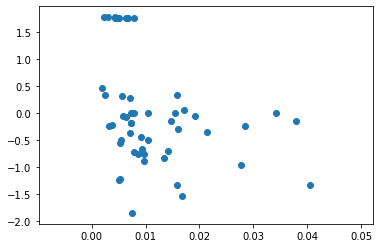

In [6]:
# your code goes here
leaf_data['smoothness'] = pd.to_numeric(leaf_data['smoothness'])
x = leaf_data['smoothness']
y = leaf_data['std_eccentricity']
plt.scatter(x, y)

Q5. Now plot the same scatter plot as Q4 but give a different color to each `class` label. What can you infer from this plot? (Provide a short answer in the form of comments.)

Text(0, 0.5, 'Standardized Eccentricity')

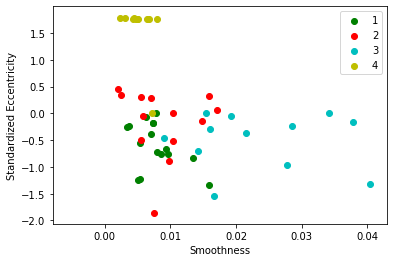

In [7]:
# your code goes here
#uhhh probably not the bet way to put a legend on this plot
leaf_class = leaf_data['class']
onex = x[leaf_data['class'] == 1]
one = y[leaf_data['class'] == 1]
twox = x[leaf_data['class'] == 2]
two = y[leaf_data['class'] == 2]
threex = x[leaf_data['class'] == 3]
three = y[leaf_data['class'] == 3]
fourx = x[leaf_data['class'] == 4]
four = y[leaf_data['class'] == 4]

plt.scatter(onex, one, c = "g", label = "1")
plt.scatter(twox, two, c = "r", label = "2")
plt.scatter(threex, three, c = "c", label = "3")
plt.scatter(fourx, four, c = "y", label = "4")

plt.legend()

plt.xlabel("Smoothness")
plt.ylabel("Standardized Eccentricity")

We see that class 4 is distinctly different than the other classes. Class 3 has a higher smoothness and an average standardized eccentricity. Classes 1 and 2 are very similar - class 2 has a slightly higher standardized eccentricity than class 1. 


Q6. Calculate the correlation coefficient between the standardized `eccentricity` and the `smoothness` column. What does this number tell us? (Provide a short answer in the form of comments.)

In [8]:
# your code goes here
leaf_data.corr()
#Correlation coefficient = -0.354418
variance = np.power(-0.354418,2.0)
print("the correlation coefficient is " + str(-0.354418))
print("the variance is " + str(variance))

the correlation coefficient is -0.354418
the variance is 0.12561211872400002


The correlation coefficient is -0.354418. Smoothness and standardized eccentricity are negatively and weakly correlated with each other. 12.56% of the variance in standardized eccentricity is attributed to smoothness.

Q7. Create a plot to determine if there are any outliers in the `average-contrast` attribute.

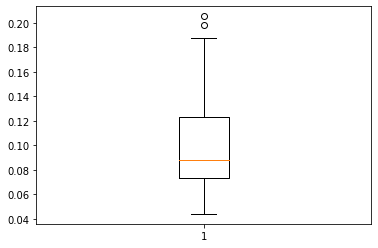

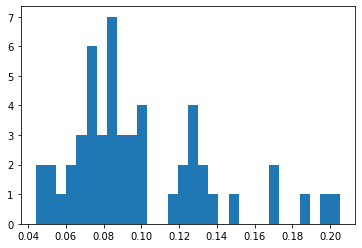

In [9]:
# your code goes here
plt.boxplot(leaf_data['average-contrast']) #looks like we have 2 outliers
plt.figure()
plt.hist(leaf_data['average-contrast'], bins = 30);

## Part 2: Adult Census Dataset

For this task we'll be using the 1994 Adult Census Income data (`adult.csv`) collected by Ronny Kohavi and Barry Becker. This is a reasonably clean dataset with both categorical and integer attributes. The dataset consists of `32.5K` rows with 14 attributes.

#### Attributes

You can find a detailed description of the dataset [here](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names).

| Attribute Name 		| Type 				|
| --------------------- | ----------------- |
| age					| continuous		|
| workclass				| categorical		|
| fnlwgt				| continuous		|
| education 			| categorical		|
| education-num			| categorical		|
| marital-status		| categorical		|
| occupation			| categorical		|
| relationship			| categorical		|
| race					| categorical		|
| sex					| categorical		|
| capital-gain			| continuous		|
| capital-loss			| continuous		|
| hours-per-week		| continuous		|
| native-country		| categorical		|

Read in the data. You can find more on reading CSV (Comma Separated Value) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [10]:
# add skipinitialspace=True to skip spaces after delimiter (will be required later for the map function)
adult_data = pd.read_csv("adult.csv", skipinitialspace=True)
# show the head of the data (first 5 values)
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
# display data types of various columns in the dataframe
adult_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

Q8. Show the distribution of the dataset with respect to the `education` column. Choose a plot that is suitable to show this.

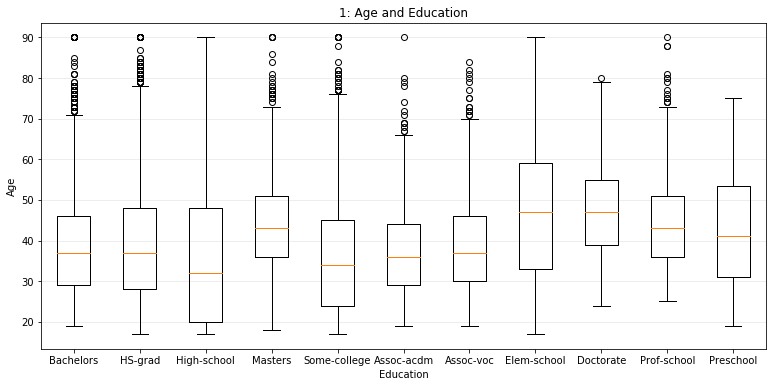

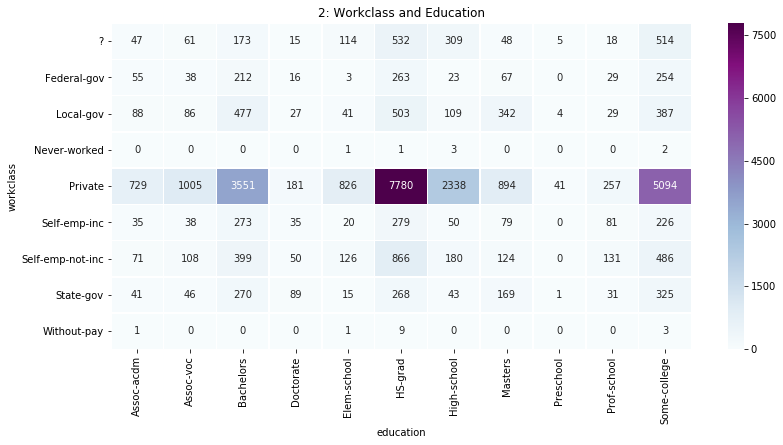

<Figure size 432x288 with 0 Axes>

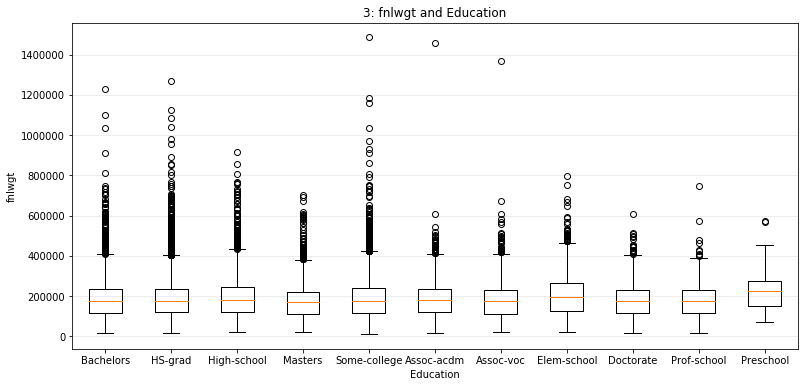

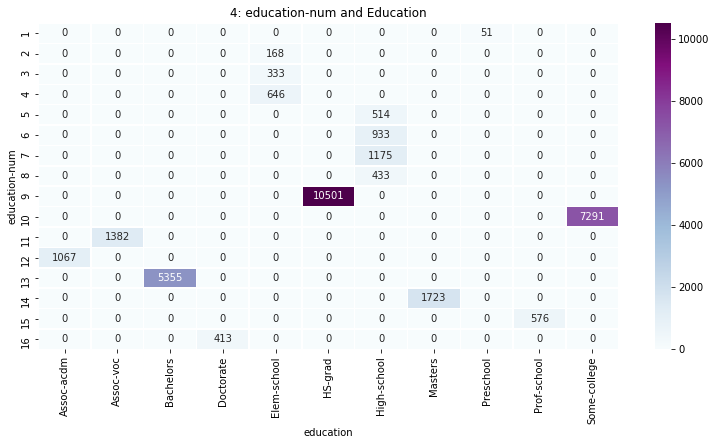

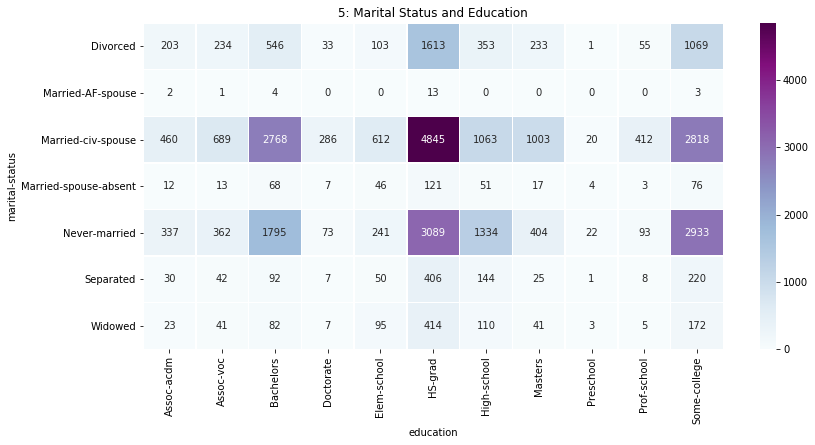

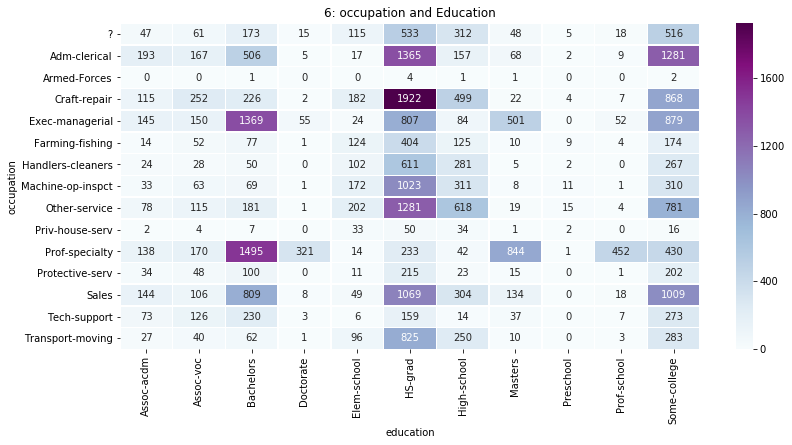

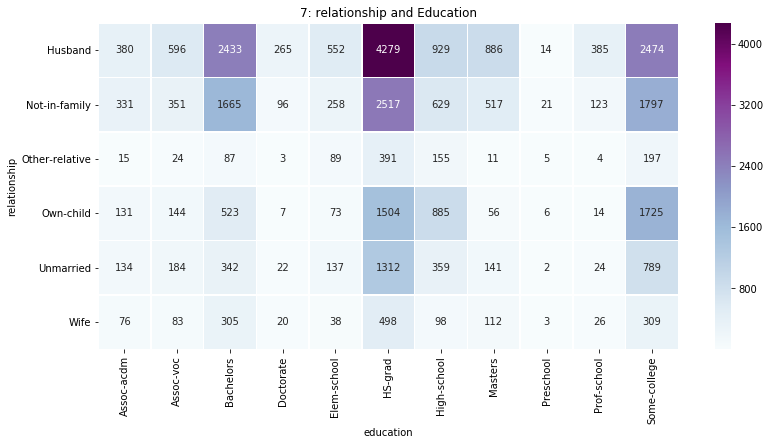

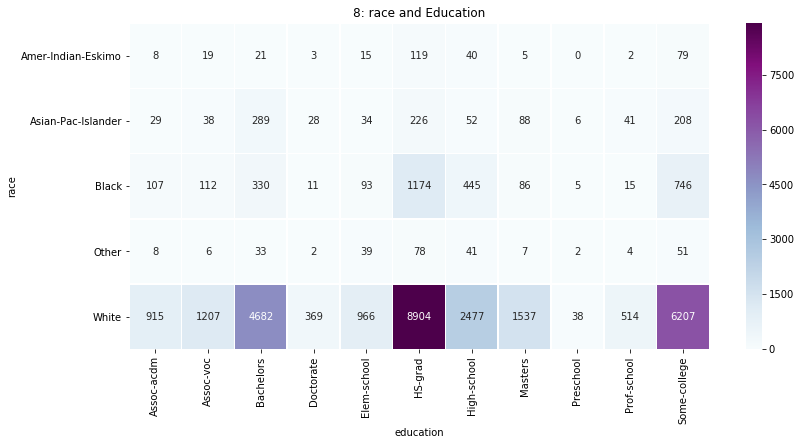

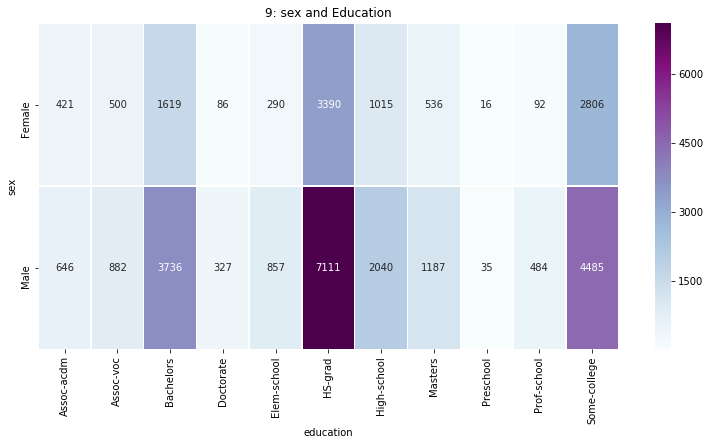

<Figure size 432x288 with 0 Axes>

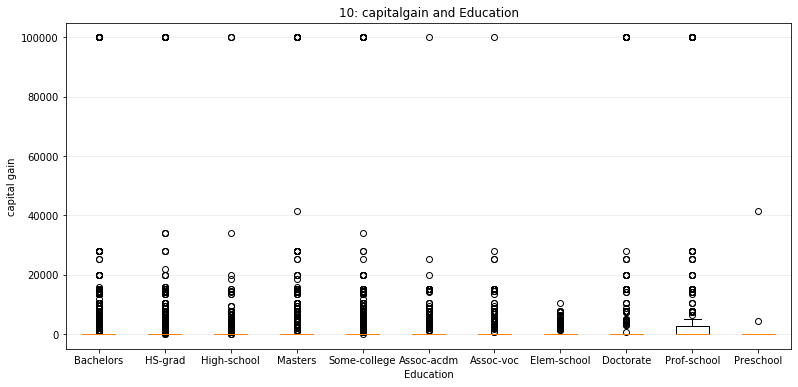

<Figure size 432x288 with 0 Axes>

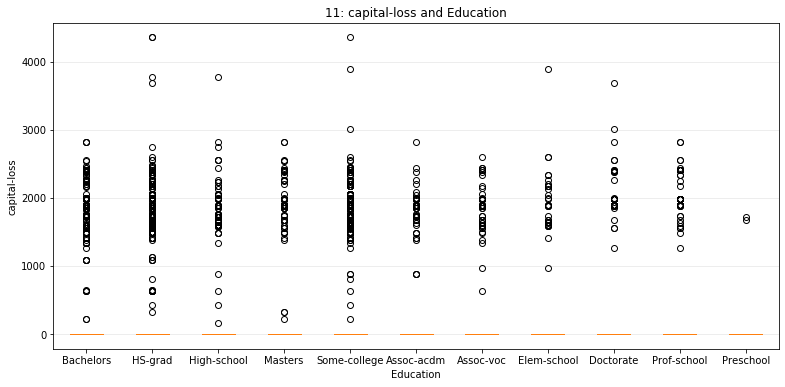

<Figure size 432x288 with 0 Axes>

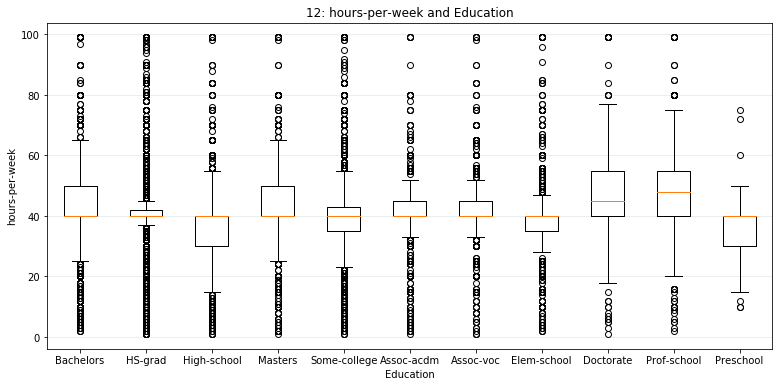

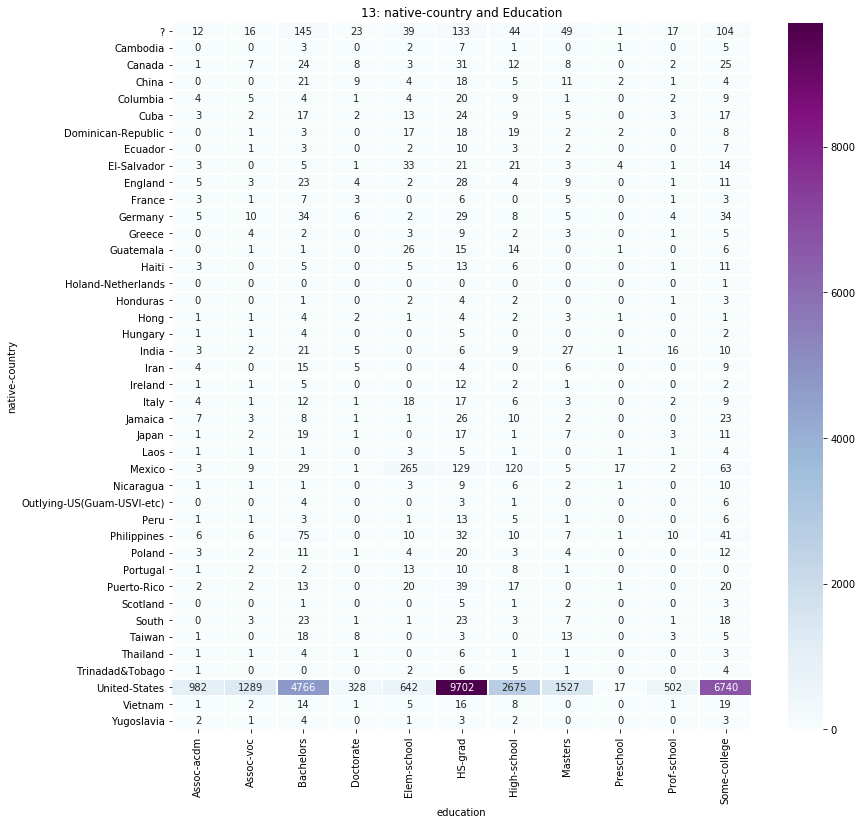

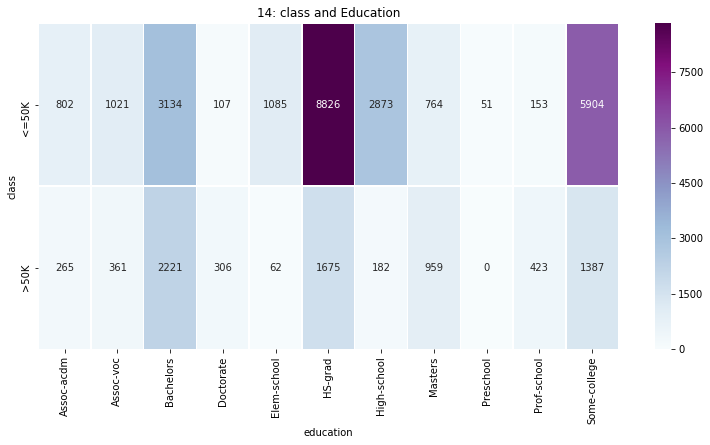

"plt.figure()\nfig, ax = plt.subplots(figsize=(13, 6))\ncopy = adult_data[['education']].copy()\ncopy.head()\nstuff = copy['education'].value_counts().tolist()\ntick = ['HS-grad', 'Some-college', 'Bachelors', 'High-school', 'Masters', 'Assoc-voc', 'Elem-school', 'Assoc-acdm', 'Prof-school', 'Doctorate', 'Preschool']\nNn = len(stuff)\nspot = np.arange(Nn)\np1 = plt.bar(spot, height = stuff)\nplt.ylabel('Counts')\nplt.title('Counts of Different Education Levels')\nplt.xticks(spot, tick)\nplt.yticks(np.arange(0, 61, 10));"

In [12]:
bach1 = adult_data[adult_data['education'] == 'Bachelors']
hsgrad2 = adult_data[adult_data['education'] == 'HS-grad']
hs3 = adult_data[adult_data['education'] == 'High-school']
mast4 = adult_data[adult_data['education'] == 'Masters']
somecoll5 = adult_data[adult_data['education'] == 'Some-college']
assocacdm6 = adult_data[adult_data['education'] == 'Assoc-acdm']
assocvoc7 = adult_data[adult_data['education'] == 'Assoc-voc']
elem8 = adult_data[adult_data['education'] == 'Elem-school']
doctor9 = adult_data[adult_data['education'] == 'Doctorate']
prof10 = adult_data[adult_data['education'] == 'Prof-school']
presch11 = adult_data[adult_data['education'] == 'Preschool']

ticklabels = ['Bachelors', 'HS-grad', 'High-school', 'Masters', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Elem-school', 'Doctorate', 'Prof-school', 'Preschool']

# 1 age
fig, ax = plt.subplots(figsize=(13, 6))
ax.set_title('1: Age and Education')
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax.boxplot([bach1['age'], hsgrad2['age'], hs3['age'], mast4['age'], 
            somecoll5['age'], assocacdm6['age'], assocvoc7['age'], 
            elem8['age'], doctor9['age'], prof10['age'], presch11['age']])
ax.set_xticklabels(ticklabels);

# 2 workclass
wce = adult_data.groupby(['workclass','education']).size().reset_index(name='counts')
wce_piv = wce.pivot("workclass", "education", "counts")
wce_piv = wce_piv.replace(np.nan, 0) 
fig2, ax2 = plt.subplots(figsize=(13, 6))
sns.heatmap(wce_piv, annot=True, linewidths=.5, ax=ax2, cmap='BuPu',fmt='g')
ax2.axes.set_title("2: Workclass and Education");

# 3 fnlwgt 
plt.figure()
fig3, ax3 = plt.subplots(figsize=(13, 6))
ax3.set_title('3: fnlwgt and Education')
ax3.set_xlabel('Education')
ax3.set_ylabel('fnlwgt')
ax3.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax3.boxplot([bach1['fnlwgt'], hsgrad2['fnlwgt'], hs3['fnlwgt'], mast4['fnlwgt'], 
            somecoll5['fnlwgt'], assocacdm6['fnlwgt'], assocvoc7['fnlwgt'], 
            elem8['fnlwgt'], doctor9['fnlwgt'], prof10['fnlwgt'], presch11['fnlwgt']])
ax3.set_xticklabels(ticklabels)

# 4 education-num technically categorical    
ene = adult_data.groupby(['education-num','education']).size().reset_index(name='counts')
ene_piv = ene.pivot("education-num", "education", "counts")
ene_piv = ene_piv.replace(np.nan, 0) 
fig4, ax4 = plt.subplots(figsize=(13, 6))
sns.heatmap(ene_piv, annot=True, linewidths=.5, ax=ax4, cmap='BuPu',fmt='g')
ax4.axes.set_title("4: education-num and Education");

# 5 marital-status  
mse = adult_data.groupby(['marital-status','education']).size().reset_index(name='counts')
mse_piv = mse.pivot("marital-status", "education", "counts")
mse_piv = mse_piv.replace(np.nan, 0) 
fig5, ax5 = plt.subplots(figsize=(13, 6))
sns.heatmap(mse_piv, annot=True, linewidths=.5, ax=ax5, cmap='BuPu',fmt='g')
ax5.axes.set_title("5: Marital Status and Education");

# 6 occupation        
oe = adult_data.groupby(['occupation','education']).size().reset_index(name='counts')
oe_piv = oe.pivot("occupation", "education", "counts")
oe_piv = oe_piv.replace(np.nan, 0) 
fig6, ax6 = plt.subplots(figsize=(13, 6))
sns.heatmap(oe_piv, annot=True, linewidths=.5, ax=ax6, cmap='BuPu',fmt='g')
ax6.axes.set_title("6: occupation and Education");

# 7 relationship      
re = adult_data.groupby(['relationship','education']).size().reset_index(name='counts')
re_piv = re.pivot("relationship", "education", "counts")
re_piv = re_piv.replace(np.nan, 0) 
fig7, ax7 = plt.subplots(figsize=(13, 6))
sns.heatmap(re_piv, annot=True, linewidths=.5, ax=ax7, cmap='BuPu',fmt='g')
ax7.axes.set_title("7: relationship and Education");

# 8 race    
rre = adult_data.groupby(['race','education']).size().reset_index(name='counts')
rre_piv = rre.pivot("race", "education", "counts")
rre_piv = rre_piv.replace(np.nan, 0) 
fig8, ax8 = plt.subplots(figsize=(13, 6))
sns.heatmap(rre_piv, annot=True, linewidths=.5, ax=ax8, cmap='BuPu',fmt='g')
ax8.axes.set_title("8: race and Education");

# 9 sex    
se = adult_data.groupby(['sex','education']).size().reset_index(name='counts')
se_piv = se.pivot("sex", "education", "counts")
se_piv = se_piv.replace(np.nan, 0) 
fig9, ax9 = plt.subplots(figsize=(13, 6))
sns.heatmap(se_piv, annot=True, linewidths=.5, ax=ax9, cmap='BuPu',fmt='g')
ax9.axes.set_title("9: sex and Education");

# 10 capital-gain     
plt.figure()
fig10, ax10 = plt.subplots(figsize=(13, 6))
ax10.set_title('10: capitalgain and Education')
ax10.set_xlabel('Education')
ax10.set_ylabel('capital gain')
ax10.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax10.boxplot([bach1['capital-gain'], hsgrad2['capital-gain'], hs3['capital-gain'], mast4['capital-gain'], 
            somecoll5['capital-gain'], assocacdm6['capital-gain'], assocvoc7['capital-gain'], 
            elem8['capital-gain'], doctor9['capital-gain'], prof10['capital-gain'], presch11['capital-gain']])
ax10.set_xticklabels(ticklabels)

# 11 capital-loss      
plt.figure()
fig11, ax11 = plt.subplots(figsize=(13, 6))
ax11.set_title('11: capital-loss and Education')
ax11.set_xlabel('Education')
ax11.set_ylabel('capital-loss')
ax11.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax11.boxplot([bach1['capital-loss'], hsgrad2['capital-loss'], hs3['capital-loss'], mast4['capital-loss'], 
            somecoll5['capital-loss'], assocacdm6['capital-loss'], assocvoc7['capital-loss'], 
            elem8['capital-loss'], doctor9['capital-loss'], prof10['capital-loss'], presch11['capital-loss']])
ax11.set_xticklabels(ticklabels)

# 12 hours-per-week   
plt.figure()
fig12, ax12 = plt.subplots(figsize=(13, 6))
ax12.set_title('12: hours-per-week and Education')
ax12.set_xlabel('Education')
ax12.set_ylabel('hours-per-week')
ax12.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax12.boxplot([bach1['hours-per-week'], hsgrad2['hours-per-week'], hs3['hours-per-week'], mast4['hours-per-week'], 
            somecoll5['hours-per-week'], assocacdm6['hours-per-week'], assocvoc7['hours-per-week'], 
            elem8['hours-per-week'], doctor9['hours-per-week'], prof10['hours-per-week'], presch11['hours-per-week']]);
ax12.set_xticklabels(ticklabels)

# 13 native-country  
nce = adult_data.groupby(['native-country','education']).size().reset_index(name='counts')
nce_piv = nce.pivot("native-country", "education", "counts")
nce_piv = nce_piv.replace(np.nan, 0) 
fig13, ax13 = plt.subplots(figsize=(13, 13))
sns.heatmap(nce_piv, annot=True, linewidths=.5, ax=ax13, cmap='BuPu',fmt='g')
ax13.axes.set_title("13: native-country and Education");

# 14 class  
ce = adult_data.groupby(['class','education']).size().reset_index(name='counts')
ce_piv = ce.pivot("class", "education", "counts")
ce_piv = ce_piv.replace(np.nan, 0) 
fig14, ax14 = plt.subplots(figsize=(13, 6))
sns.heatmap(ce_piv, annot=True, linewidths=.5, ax=ax14, cmap='BuPu',fmt='g')
ax14.axes.set_title("14: class and Education");

plt.show()

'''plt.figure()
fig, ax = plt.subplots(figsize=(13, 6))
copy = adult_data[['education']].copy()
copy.head()
stuff = copy['education'].value_counts().tolist()
tick = ['HS-grad', 'Some-college', 'Bachelors', 'High-school', 'Masters', 'Assoc-voc', 'Elem-school', 'Assoc-acdm', 'Prof-school', 'Doctorate', 'Preschool']
Nn = len(stuff)
spot = np.arange(Nn)
p1 = plt.bar(spot, height = stuff)
plt.ylabel('Counts')
plt.title('Counts of Different Education Levels')
plt.xticks(spot, tick)
plt.yticks(np.arange(0, 61, 10));'''


Q9.
* Group the `adult_data` using the `marital-status` column. You may want to look at the `groupby()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html).
* Display the mean, median and standard deviation statistics of `hours-per-week` column for each `marital-status` column.
* As a comment, note which marital status category has the maximum average work hours per week? Which has the most variability in work hours per week? 

In [13]:
# your code here
#nce = adult_data.groupby(['native-country','education']).size().reset_index(name='counts')
new_data = adult_data[['marital-status', 'hours-per-week']].copy()
meanhrs = new_data.groupby(['marital-status']).mean()
medianhrs = new_data.groupby(['marital-status']).median()
stdhrs = new_data.groupby(['marital-status']).std()
print("The mean hours per week for individuals with different marital statues are: ")
print(meanhrs)
print("\nThe median hours per week for individuals with different marital statues are: ")
print(medianhrs)
print("\nThe standard deviation of hours per week for individuals with different marital statues are: ")
print(stdhrs)
print("\nIndividuals who are Married-civ-spouse work the most hours every week.")
print("\nIndividuals who are Married-AF-spouse work the most variable hours every week.")

The mean hours per week for individuals with different marital statues are: 
                       hours-per-week
marital-status                       
Divorced                    41.246680
Married-AF-spouse           41.130435
Married-civ-spouse          43.284856
Married-spouse-absent       39.669856
Never-married               36.939998
Separated                   39.301463
Widowed                     32.979859

The median hours per week for individuals with different marital statues are: 
                       hours-per-week
marital-status                       
Divorced                           40
Married-AF-spouse                  40
Married-civ-spouse                 40
Married-spouse-absent              40
Never-married                      40
Separated                          40
Widowed                            40

The standard deviation of hours per week for individuals with different marital statues are: 
                       hours-per-week
marital-status            

In [14]:
# Please don't change this cell!!
continent_dict = {
    'Cambodia' : 'Asia',
    'Canada' : 'North-America',
    'China' : 'Asia',
    'Columbia' : 'South-America',
    'Cuba' : 'North-America',
    'Dominican-Republic' : 'North-America',
    'Ecuador' : 'South-America',
    'El-Salvador' : 'North-America',
    'England' : 'Europe',
    'France' : 'Europe',
    'Germany' : 'Europe',
    'Greece' : 'Europe',
    'Guatemala' : 'North-America',
    'Haiti' : 'North-America',
    'Holand-Netherlands' : 'Europe',
    'Honduras' : 'North-America',
    'Hong' : 'Asia',
    'Hungary' : 'Europe',
    'India' : 'Asia',
    'Iran' : 'Asia',
    'Ireland' : 'Europe',
    'Italy' : 'Europe',
    'Jamaica' : 'North-America',
    'Japan' : 'Asia',
    'Laos' : 'Asia',
    'Mexico' : 'North-America',
    'Nicaragua' : 'North-America',
    'Outlying-US(Guam-USVI-etc)' : 'North-America',
    'Peru' : 'South-America',
    'Philippines' : 'Asia',
    'Poland' : 'Europe',
    'Portugal' : 'Europe',
    'Puerto-Rico' : 'North-America',
    'Scotland' : 'Europe',
    'South' : 'Other',
    'Taiwan' : 'Asia',
    'Thailand' : 'Asia',
    'Trinadad&Tobago' : 'South-America',
    'United-States' : 'North-America',
    'Vietnam' : 'Asia',
    'Yugoslavia' : 'Europe',
    '?' : 'Other'
}

Q10. Using the dictionary provided above, create a new column called `continent` using the existing `native-country` column in the dataframe. You may want to look at the `map()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html). Display the head of the new dataframe.

In [15]:
# You will want to create a deep copy of the initial dataframe object
# so that you can run this cell multiple times without errors.
adult_data_copy = adult_data.copy()
adult_data_copy['continent']= adult_data_copy['native-country'].map(continent_dict)
adult_data_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,continent
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,North-America
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,North-America
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,North-America
3,53,Private,234721,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,North-America
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,North-America


Q11. Use matplotlib to plot a bar graph showing the average age of adults from each continent, and show the standard deviation on the same graph.

An example bar plot with standard deviation bars:
<img src="imgs/screen3.png" width=400>

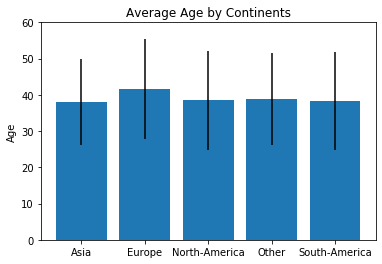

In [16]:
adult_data_copy2 = adult_data_copy[['age', 'continent']].copy()
adult_data_copy2.head()
meanage = adult_data_copy2.groupby(['continent']).mean()
stdage = adult_data_copy2.groupby(['continent']).std()
magelist = meanage['age'].tolist()
sagelist = stdage['age'].tolist()
ticks = ['Asia', 'Europe', 'North-America', 'Other', 'South-America']
N = len(magelist)
spots = np.arange(N)
p1 = plt.bar(spots, magelist, yerr=sagelist)
plt.ylabel('Age')
plt.title('Average Age by Continents')
plt.xticks(spots, ticks)
plt.yticks(np.arange(0, 61, 10));

Q12. To reduce the dimensionality of this dataset, which attribute or attributes would you eliminate? Explain why.

In [17]:
'''Explain why here (as a comment): Education because the column describes the same data as the education-num column. The education column provides less information than the education-num column because education-num describes which exact year of schooling the individual achieved. Having both columns is redundant. '''

'Explain why here (as a comment): Education because the column describes the same data as the education-num column. The education column provides less information than the education-num column because education-num describes which exact year of schooling the individual achieved. Having both columns is redundant. '